# S50F-DNN ฺฺBatchSize


Baseline Neural Network Model Performance

In [240]:
xseed=1982

from numpy.random import seed
seed(xseed)
from tensorflow import set_random_seed
set_random_seed(xseed)
import matplotlib.pyplot as plt

In [241]:
 # Binary Classification with Sonar Dataset: Baseline
import numpy
import pandas


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier



from keras.layers import Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.constraints import maxnorm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from keras.callbacks import LearningRateScheduler

import joblib

import os
from datetime import datetime

import matplotlib.pyplot as plt

In [242]:
train_st='2007'
train_end='2018'

test_st='2019'
test_end='2020'

strategyName='long'

if strategyName=='long' :
 filename='ML-Long_S50M15_07To1Q20-Train.csv'
 filepath=os.path.abspath(f'D:\\Dev-Trong\\DataSet\\{filename}')
else:
  filename='ML-Short_S50M15_07To1Q20-Train_V2.csv'
  filepath=os.path.abspath(f'D:\\Dev-Trong\\DataSet\\short_v2\\{filename}')

print(filepath)


D:\Dev-Trong\DataSet\ML-Long_S50M15_07To1Q20-Train.csv


In [243]:
def CreateData(dfx,labelCol):
 
 X_df_temp =dfx.drop(columns=['open','high','low','close',labelCol])
 Y_df_temp = dfx[labelCol]

 Xtemp=X_df_temp.to_numpy()
 ytemp=Y_df_temp.to_numpy()

 return X_df_temp,Y_df_temp, Xtemp,ytemp

# Train Data by WFA

In [244]:
# load dataset

dataframe = pandas.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)

print(dataframe.info())
dataframe.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69679 entries, 2007-01-03 09:45:00 to 2020-03-31 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    69679 non-null  float64
 1   high                    69679 non-null  float64
 2   low                     69679 non-null  float64
 3   close                   69679 non-null  float64
 4   indy_ma-550             69679 non-null  float64
 5   indy_ma-1100            69679 non-null  float64
 6   indy_hh-550             69679 non-null  float64
 7   indy_ll-550             69679 non-null  float64
 8   indy_mid-550            69679 non-null  float64
 9   indy_hh2-1100           69679 non-null  float64
 10  indy_ll2-1100           69679 non-null  float64
 11  indy_mid2-1100          69679 non-null  float64
 12  indy_macd110-440        69679 non-null  float64
 13  indy_signal110-440-110  69679 non-null  float64
 14  ind

(69679, 22)

In [245]:
labelName=dataframe.columns[-1]
print('Lable Column: ',labelName)

Lable Column:  LongSignal


In [246]:
df=dataframe[train_st:train_end]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62855 entries, 2007-01-03 09:45:00 to 2018-12-28 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    62855 non-null  float64
 1   high                    62855 non-null  float64
 2   low                     62855 non-null  float64
 3   close                   62855 non-null  float64
 4   indy_ma-550             62855 non-null  float64
 5   indy_ma-1100            62855 non-null  float64
 6   indy_hh-550             62855 non-null  float64
 7   indy_ll-550             62855 non-null  float64
 8   indy_mid-550            62855 non-null  float64
 9   indy_hh2-1100           62855 non-null  float64
 10  indy_ll2-1100           62855 non-null  float64
 11  indy_mid2-1100          62855 non-null  float64
 12  indy_macd110-440        62855 non-null  float64
 13  indy_signal110-440-110  62855 non-null  float64
 14  ind

In [247]:
df_test=dataframe[test_st:test_end]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6824 entries, 2019-01-02 09:45:00 to 2020-03-31 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    6824 non-null   float64
 1   high                    6824 non-null   float64
 2   low                     6824 non-null   float64
 3   close                   6824 non-null   float64
 4   indy_ma-550             6824 non-null   float64
 5   indy_ma-1100            6824 non-null   float64
 6   indy_hh-550             6824 non-null   float64
 7   indy_ll-550             6824 non-null   float64
 8   indy_mid-550            6824 non-null   float64
 9   indy_hh2-1100           6824 non-null   float64
 10  indy_ll2-1100           6824 non-null   float64
 11  indy_mid2-1100          6824 non-null   float64
 12  indy_macd110-440        6824 non-null   float64
 13  indy_signal110-440-110  6824 non-null   float64
 14  indy

In [248]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=xseed)

X_df,y_df,X_train,y_train=CreateData(df,labelName)
Xtest_df,ytest_df,X_test,y_test=CreateData(df_test,labelName)

print("X-Train ",X_train.shape)

print("X-Test ",X_test.shape)

print("y-Train ",y_train.shape)

print("y-Test ",y_test.shape)

X-Train  (62855, 17)
X-Test  (6824, 17)
y-Train  (62855,)
y-Test  (6824,)


In [249]:
#scaler=StandardScaler().fit(X_train)
scaler=MinMaxScaler().fit(X_train)

Xtrain_scaled=scaler.transform(X_train)
Xtest_scaled=scaler.transform(X_test)



# Model Defination

In [1]:

h1=17
h2=34
h3=17

xpoch=100

xbatch=len(X_train) #batch Gradient Descent  // medium and large LR=0.1 ,0.01
#xbatch=1  #stochastic Gradient Descent  // require small LR =0.001
#xbatch=32  #Minibatch Gradient Descent   // any LR like  0.01

#my_kernelInit='he_uniform'
my_kernelInit='normal'
#my_kernelInit='glorot_uniform',

print("epochs=",xpoch)
print("batch_size=",xbatch)


epochs= 200
batch_size= 32


In [2]:
def modelX():
    


 model = Sequential()  
  
 model.add(Dense(h1, input_dim=X_train.shape[1], kernel_initializer=my_kernelInit,activation='relu' ))

 model.add(Dense(h2, kernel_initializer=my_kernelInit,activation='relu'))

 model.add(Dense(h3,kernel_initializer=my_kernelInit,activation='relu'))

 model.add(Dense(1, kernel_initializer=my_kernelInit, activation='sigmoid'))
 
 optz=SGD(lr=0.01,momentum=0.9)

 model.compile(loss='binary_crossentropy', optimizer=optz, metrics=['accuracy'])
 
 return model


In [3]:

model=modelX()

history_model=model.fit(Xtrain_scaled,y_train,validation_data=(Xtest_scaled,y_test),epochs=xpoch,batch_size=xbatch)

NameError: name 'Sequential' is not defined

In [253]:
loss_train,acc_train=model.evaluate(Xtrain_scaled,y_train)
print( 'train %acc',round( acc_train*100,2))

loss_test,acc_test=model.evaluate(Xtest_scaled,y_test)
print( 'test %acc',round( acc_test*100,2))




62855/62855 [==============================] - 1s 14us/step
train %acc 99.43
6824/6824 [==============================] - 0s 14us/step
test %acc 80.63


In [254]:
print(history_model.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [255]:
history_model.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

NameError: name 'history_model' is not defined

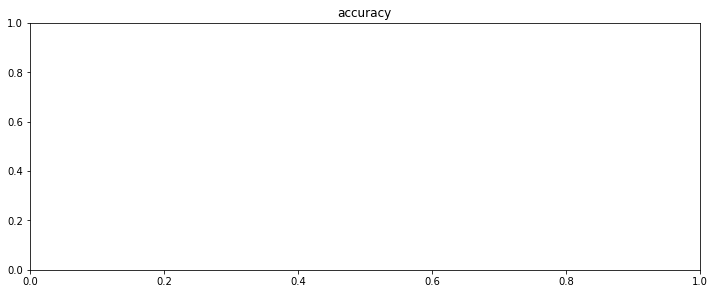

In [21]:
# summarize history for accuracy

plt.figure(figsize=(12,10))

plt.subplot(211)
plt.title("accuracy")

plt.plot(history_model.history['accuracy'],label='train')
plt.plot(history_model.history['val_accuracy'],label='test')
plt.legend()

plt.subplot(212)
plt.title("loss")
plt.plot(history_model.history['loss'],label="train")
plt.plot(history_model.history['val_loss'],label="test")
plt.legend()


plt.show()

# summarize this as follows:
    
    Batch Gradient Descent:  Use a relatively larger learning rate and more training epochs.
  
    Stochastic Gradient Descent:  Use a relatively smaller learning rate and fewer trainingepochs.
  

The plots show that small batch results generally in rapid learning but a volatile learningprocess with higher variance in the classification accuracy.  Larger batch sizes slow down thelearning process (in terms of the learning curves) but the final stages result in a convergence toa more stable model exemplified by lower variance in classification accuracy.